# **Support Vector Machine**

**Support Vector Machine (SVM)** is a supervised machine learning algorithm used for both classification and regression tasks, though it is mostly used for classification. The goal of SVM is to find a hyperplane in an N-dimensional space (where N is the number of features) that distinctly classifies the data points. The best hyperplane is the one that maximizes the margin between the two classes, meaning it is as far as possible from the nearest data points of each class.

- **Support vectors** are the data points that are closest to the hyperplane. They are the most critical elements of the dataset because they define the decision boundary.

- **Margin** is the distance between the hyperplane and the nearest data points from either class. SVM seeks to maximize this margin to improve model generalization.

#### When to Use Support Vector Machine?
SVM is particularly useful in scenarios where:

- **You have small or medium-sized datasets**: SVM works best on smaller datasets as it can be computationally expensive for large datasets.

- **The data is linearly separable**: SVM is most effective when the data can be clearly separated into two distinct classes by a straight line (in 2D) or a hyperplane (in higher dimensions).

- **You need a model that can handle high-dimensional data**: SVM is capable of performing well even when the number of features exceeds the number of samples, making it suitable for problems like text classification.

- **The classes are well separated**: SVM works well when there is a clear margin between the classes.

- **You need to avoid overfitting**: SVM focuses on maximizing the margin between classes, which often helps avoid overfitting in classification tasks.

#### How Does Support Vector Machine Work?

1. **Hyperplane Calculation**: In a binary classification problem, the goal of SVM is to find a hyperplane that best separates the data into two classes. In two-dimensional space, this hyperplane is a line, but in higher-dimensional space, it becomes a plane or hyperplane.

2. **Maximizing the Margin**: SVM tries to find the hyperplane that maximizes the margin between the two classes. The margin is the distance between the hyperplane and the closest data points from each class (called support vectors). The larger the margin, the better the generalization ability of the classifier.

3. **Linear vs. Non-Linear Classification**:

    - **Linear SVM**: If the data is linearly separable, SVM will find the optimal hyperplane that separates the two classes.

    - **Non-Linear SVM (Kernel SVM)**: In many real-world problems, the data is not linearly separable. SVM uses a technique called the kernel trick to map the data into a higher-dimensional space where a linear separation becomes possible. Some commonly used kernels include:

        - **Polynomial kernel**: For capturing polynomial relationships between features.

        - **Radial Basis Function (RBF) kernel (Gaussian kernel)**: Useful for complex, non-linear relationships.

4. **Soft Margin vs. Hard Margin**:

    - **Hard margin SVM**: Enforces that no data points from either class are allowed to be within the margin or misclassified. This is rarely used because real-world data often contains noise and overlaps.

    - **Soft margin SVM**: Allows some misclassification or violation of the margin (controlled by a parameter C) to account for noisy or overlapping data.


5. **Classification and Prediction**: Once the SVM model has found the optimal hyperplane, new data points are classified by determining on which side of the hyperplane they fall.

#### Who Should Use Support Vector Machine?

SVM is a good choice for:

- **Researchers and practitioners** in fields like bioinformatics, image recognition, and text categorization, where datasets might be small but have many features.

- **Data scientists** looking for a robust classifier that works well in high-dimensional spaces.

- **Machine learning engineers** dealing with classification problems where the data is non-linearly separable but a strong decision boundary is needed.

- **Business analysts** who need an accurate and interpretable model when the classes are well-separated.###

#### Advantages of Support Vector Machine:

- **Effective in high-dimensional spaces**: SVM works well when the number of features is large, even more than the number of samples.

- **Robust to overfitting**: By maximizing the margin, SVM often generalizes well to unseen data, especially with appropriate tuning of the C parameter.

- **Flexibility with non-linear data**: With the use of kernels, SVM can effectively classify data that is not linearly separable.

- **Memory efficient**: SVM uses only a subset of the training points (the support vectors), making it efficient in memory usage.

#### Disadvantages of Support Vector Machine:

- **Computationally expensive**: SVM can be slow and memory-intensive, especially for large datasets.

- **Hard to interpret**: SVMs are not as easy to interpret as models like decision trees or logistic regression.

- **Requires careful tuning of parameters**: The performance of SVM depends on the choice of kernel, regularization parameter C, and other hyperparameters. Poor tuning can lead to suboptimal results.

- **Not suitable for large datasets**: SVM can struggle with very large datasets because of its computational complexity.

#### Real-World Applications:

- Image Recognition: SVM is widely used in image classification tasks, such as handwriting recognition or face detection.

- Bioinformatics: SVMs are used to classify proteins and genes, making them useful in genomics and biological sequence analysis.

- Text Classification: SVM is commonly used in text categorization (e.g., spam detection) because of its ability to handle high-dimensional data.

- Medical Diagnosis: SVM helps classify diseases based on symptoms or medical images, such as classifying tumors as malignant or benign.

- Stock Market Prediction: SVM is used to predict stock market trends by classifying historical data into different categories.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

mean1 = 55
std_dev1 = 10
num_samples = 500

column1_numbers = np.random.normal(mean1, std_dev1, num_samples)
column1_numbers = np.clip(column1_numbers, 30, 120)
column1_numbers = np.round(column1_numbers).astype(int)

mean2 = 18
std_dev2 = 3

column2_numbers = np.random.normal(mean2, std_dev2, num_samples)
column2_numbers = np.clip(column2_numbers, 12, 26)
column2_numbers = np.round(column2_numbers).astype(int)

column3_numbers = np.random.randint(2, size=num_samples)
column3_numbers[column1_numbers > mean1] =1

data = {"Miles_Per_week": column1_numbers,
        "Farthest_run": column2_numbers,
        "Qualified_Boston_Marathon": column3_numbers}

df = pd.DataFrame(data)

df

,Miles_Per_week,Farthest_run,Qualified_Boston_Marathon
0,53,16,1
1,60,20,1
2,44,12,1
3,65,18,1
4,70,21,1
...,...,...,...
495,58,17,1
496,55,12,0
497,43,18,1
498,73,22,1


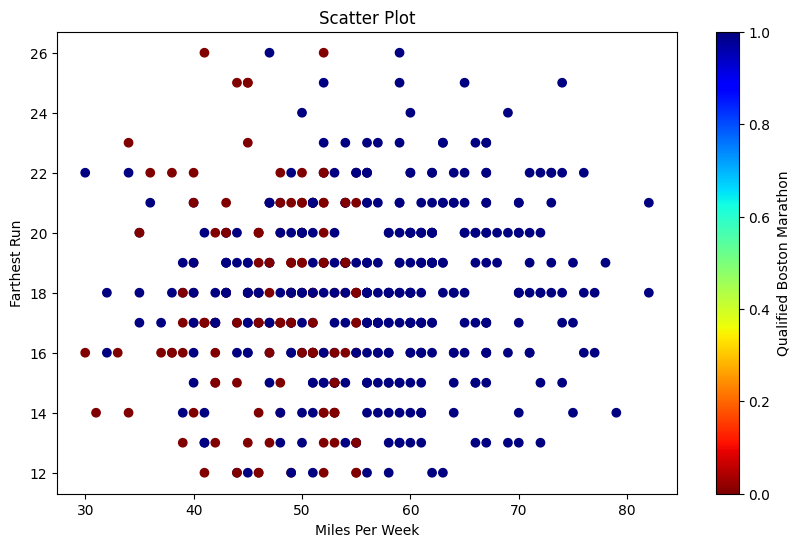

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(df['Miles_Per_week'], df['Farthest_run'], c=df['Qualified_Boston_Marathon'], cmap='jet_r')
plt.xlabel("Miles Per Week")
plt.ylabel("Farthest Run")
plt.title("Scatter Plot")
plt.colorbar(label="Qualified Boston Marathon")
plt.show()

In [23]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=33, test_size=0.2)
model = SVC()

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.76


In [24]:
model_reg0 = SVC(C=0.1)
model_reg0.fit(X_train, y_train)
print(model_reg0.score(X_test, y_test))

0.76


In [25]:
model_reg1 = SVC(C=1)
model_reg1.fit(X_train, y_train)
print(model_reg1.score(X_test, y_test))

0.76


In [26]:
model_reg2 = SVC(C=1000)
model_reg2.fit(X_train, y_train)
print(model_reg2.score(X_test, y_test))

0.73


### Gamma

In [27]:
model_gamma0 = SVC(gamma=0.1)
model_gamma0.fit(X_train, y_train)
model_gamma0.score(X_test, y_test)

0.71

In [28]:
model_gamma1 = SVC(gamma=1)
model_gamma1.fit(X_train, y_train)
model_gamma1.score(X_test, y_test)

0.74

In [29]:
model_gamma2 = SVC(gamma=1000)
model_gamma2.fit(X_train, y_train)
model_gamma2.score(X_test, y_test)

0.74

### Kernel

In [30]:
model_kernel0 = SVC(kernel='linear')
model_kernel0.fit(X_train, y_train)
model_kernel0.score(X_test, y_test)

0.74

In [31]:
model_kernel0 = SVC(kernel='rbf')
model_kernel0.fit(X_train, y_train)
model_kernel0.score(X_test, y_test)

0.76